# Worked through example of the annealing plot

We will nox exemplify how we produced Figure 2 in [Limitations of optimization algorithms on noisy quantum devices](https://arxiv.org/abs/2009.05532). In this figure we plotted what our methods say about the maximal annealing time of noisy annealing devices under amplitude damping and control errors.
We refer to the paper for a detailed explanation of the notation and concepts, but at the end of this notebook we will produce the plot shown in that figure.

In Eq. (10) we show the inequality:
\begin{align}
&D(\mathcal{T}_T(|+\rangle\langle +|^{\otimes n})||\sigma_\gamma)\leq n f(\gamma,r,T,\bar{\Gamma})
\end{align}
where
\begin{align}\label{equ:locadep}
f(\gamma,r,T,\bar{\Gamma})= e^{-r T}\log(2\cosh(\gamma))\nonumber +\frac{2\sinh(\gamma)( 1-e^{-rT}r T-e^{-rT})}{r^2T} \bar{\Gamma}
\end{align}
and $\bar{\Gamma}=n^{-1}\sum_i\Gamma_i$. Also recall that $r=r_1+r_3$, where $r_1$ is the amplitude damping rate and $r_3$ the standard deviation of the control errors. The values of $r_1$ and $r_2$ also pin down the value of $\gamma$,
\begin{align*}
\gamma=\frac{1}{2}\log\left(1+\frac{r_1}{r_3}\right).
\end{align*}

Our bounds assert that the annealing device performs as well as polynomial-time Monte Carlo methods whenever:
\begin{align}
f(\gamma,r,T,\bar{\Gamma})\leq \frac{\|H_I\|}{4\log(2)\|A\|n}\epsilon.
\end{align}
As explained in the text, the term $\frac{\|H_I\|}{4\|A\|n}$ is of constant order. Moreover, numerical experiments with the variational bound show that Monte Carlo methods in the polynomial-time range consistently outperform noisy quantum computers at relative entropy densities in the range $10^{-1}-2\times 10^{-1}$. Thus, we will conservatively pick the threshold $\frac{\|H_I\|}{4\|A\|n}\epsilon=0.025$, which corresponds to $\epsilon=10^{-1}$ for the rigorous guarantee in Eq. (4). Let $\frac{\|H_I\|}{4\|A\|n}\epsilon$ be the threshold value defined below. We will also define the $f$ function.


In [1]:
threshold=0.025

import numpy as np
def f(gamma,r,T,Gamma):
    expo_part=np.exp(-r*T)*np.log(2*np.cosh(gamma))
    poly_part=Gamma*2*np.sinh(gamma)*(1-np.exp(-r*T)*r*T-np.exp(-r*T))/(r*r*T)
    return expo_part+poly_part

def gamma(r1,r3):
    return 0.5*np.log(1+r1/r3)

We will now estimate the annealing time for which we lose advantage for realistic noise parameters. As explained in the text, we pick $\Gamma=1$. Letting $J$ the maximal interaction strength of the device, we set $r_3\times J=2\times 10^{-2}$, the value reported in a commercially available device's manual. The value of $r_1$ is not reported, so we will consider various choices. We now have all the tools at hand to estimate the maximal annealing time before we lose advantage. We will do log plots of the relative entropy density, as they make it easier to visualize the bound.

In [2]:
r3=0.02
Gamma=1

import matplotlib as mpl
import matplotlib.pyplot as plt
#setting maximal annealing time we want to plot
Tmax=10**3
annealing_times=xs=np.linspace(0.1,Tmax,300)

#first line with r_1=10^(-2)xr_3

r1=0.01*r3

rel_entropy_dens=[]
for t in annealing_times:
    rel_entropy_dens.append(np.log(f(gamma(r1,r3),r1+2*r3,t,Gamma))/np.log(10))



plt.plot(annealing_times,rel_entropy_dens,'r',label="$r_1=10^{-2} r_3$")
plt.title("Relative entropy density for noisy annealers, $r_3=10^{-2}J$")
plt.xlabel('Annealing time ($x J$)')
plt.ylabel('log-Relative entropy density')




#second plot with r_1=10^(-1)xr_3

r1=0.1*r3

rel_entropy_dens=[]
for t in annealing_times:
    rel_entropy_dens.append(np.log(f(gamma(r1,r3),r1+2*r3,t,Gamma))/np.log(10))



plt.plot(annealing_times,rel_entropy_dens,'orange',label="$r_1=10^{-1} r_3$")

plt.ylim([-4,0])
plt.legend() 




Let us now find the points the polynomial-time crossover happens an plot them in the curve:

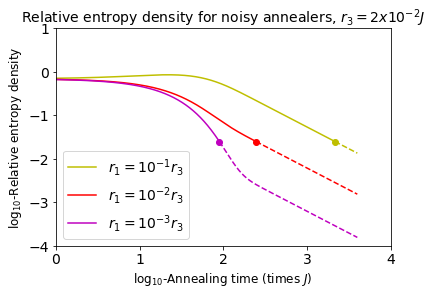

In [3]:
r3=0.02
Gamma=1
#function that finds when the curve passes a given point
def find_crossover(results,value):
    k=0
    while (results[k]>value):
        k+=1
    return k


#setting maximal annealing time we want to plot
Tmax=4000
annealing_times=xs=np.linspace(0.1,Tmax,Tmax*10)


#font sizes for better visualization
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 12

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


#second plot with r_1=10^(-1)xr_3

r1=0.1*r3

rel_entropy_dens=[]
for t in annealing_times:
    rel_entropy_dens.append(np.log(f(gamma(r1,r3),r1+2*r3,t,Gamma))/np.log(10))

#let us now find the polynomial time transition point
t_trans=find_crossover(rel_entropy_dens,np.log(threshold)/np.log(10))
plt.scatter(np.log(annealing_times[t_trans])/np.log(10),rel_entropy_dens[t_trans],color='y')


plt.plot(np.log(annealing_times[0:t_trans])/np.log(10),rel_entropy_dens[0:t_trans],'y',label="$r_1=10^{-1} r_3$")
plt.plot(np.log(annealing_times[t_trans:])/np.log(10),rel_entropy_dens[t_trans:],'y--')



plt.ylim([-4,-0.8])
plt.legend() 










#first line with r_1=10^(-2)xr_3

r1=0.01*r3

rel_entropy_dens=[]
for t in annealing_times:

    rel_entropy_dens.append(np.log(f(gamma(r1,r3),r1+2*r3,t,Gamma))/np.log(10))

    
    

#let us now find the polynomial time transition point
t_trans=find_crossover(rel_entropy_dens,np.log(threshold)/np.log(10))
plt.scatter(np.log(annealing_times[t_trans])/np.log(10),rel_entropy_dens[t_trans],color='r')


plt.plot(np.log(annealing_times[0:t_trans])/np.log(10),rel_entropy_dens[0:t_trans],'r',label="$r_1=10^{-2} r_3$")
plt.plot(np.log(annealing_times[t_trans:])/np.log(10),rel_entropy_dens[t_trans:],'r--')



plt.title("Relative entropy density for noisy annealers, $r_3=2x 10^{-2}J$")
plt.xlabel('$\log_{10}$-Annealing time (times $J$)')
plt.ylabel('$\log_{10}$-Relative entropy density')








#second plot with r_1=10^(-3)xr_3

r1=0.001*r3

rel_entropy_dens=[]
for t in annealing_times:
    rel_entropy_dens.append(np.log(f(gamma(r1,r3),r1+2*r3,t,Gamma))/np.log(10))

#let us now find the polynomial time transition point
t_trans=find_crossover(rel_entropy_dens,np.log(threshold)/np.log(10))
plt.scatter(np.log(annealing_times[t_trans])/np.log(10),rel_entropy_dens[t_trans],color='m')


plt.plot(np.log(annealing_times[0:t_trans])/np.log(10),rel_entropy_dens[0:t_trans],'m',label="$r_1=10^{-3} r_3$")
plt.plot(np.log(annealing_times[t_trans:])/np.log(10),rel_entropy_dens[t_trans:],'m--')





plt.ylim([-4,1])
plt.xlim([0,4])
plt.legend() 





plt.savefig('annealing.pdf')

